In [5]:
from pydub import AudioSegment
import sounddevice as sd
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np


def remove_noise(input_file, output_file, noise_threshold=-40):
    # Carrega o áudio original do arquivo WAV usando a biblioteca Pydub
    audio = AudioSegment.from_file(input_file, format="wav")

    # Calcula o Root Mean Square (RMS) em decibéis do sinal de áudio
    rms = audio.dBFS

    # Calcula o ganho necessário para atingir o limiar de ruído especificado
    gain = noise_threshold - rms

    # Aplica o ganho ao sinal de áudio para remover o ruído
    denoised_audio = audio + gain

    # Exporta o áudio denoised para um novo arquivo WAV
    denoised_audio.export(output_file, format="wav")

    # Lê o áudio denoised do arquivo WAV usando a biblioteca scipy.io.wavfile
    fs, data = wavfile.read(output_file) 

    # Reproduz o áudio denoised usando a biblioteca Sounddevice
    sd.play(data, fs)
    return audio, denoised_audio  # Return both original and denoised audio


# Chama a função remove_noise para remover o ruído do arquivo "pad.wav"
remove_noise('pad.wav', 'output_denoised_audio.wav')


(<pydub.audio_segment.AudioSegment at 0x2ecdc7615d0>,
 <pydub.audio_segment.AudioSegment at 0x2ecdbba2150>)

<Figure size 1200x600 with 0 Axes>

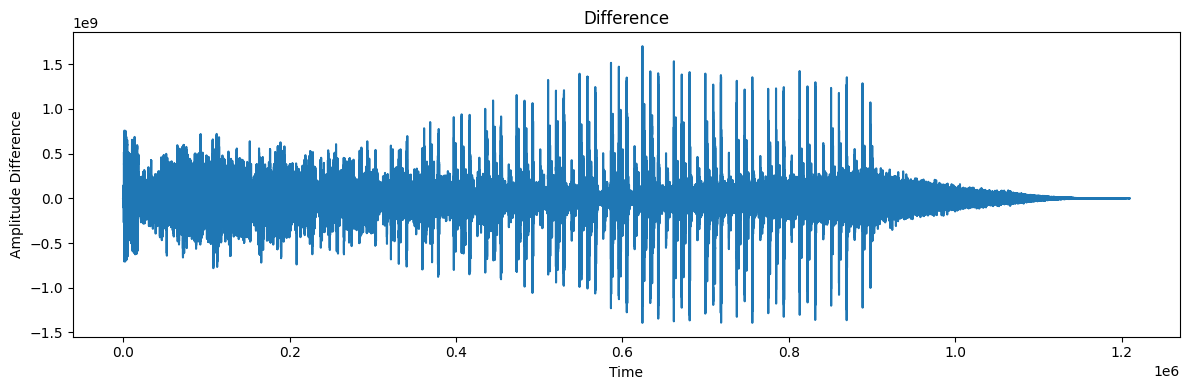

In [6]:
def plot_audio_comparison(original, denoised):
    # Cria uma figura para plotagem
    plt.figure(figsize=(12, 6))
    # Cria uma sub-figura para plotar a diferença entre os sinais
    plt.figure(figsize=(12, 4))

    # Converte os sinais de áudio original e denoised em arrays NumPy
    original_array = np.array(original.get_array_of_samples())
    denoised_array = np.array(denoised.get_array_of_samples())

    # Calcula a diferença entre os sinais
    difference = original_array - denoised_array

    # Plota a diferença
    plt.plot(difference)
    plt.title('Difference')  # Título do gráfico
    plt.xlabel('Time')  # Rótulo do eixo x
    plt.ylabel('Amplitude Difference')  # Rótulo do eixo y

    plt.tight_layout()  # Ajusta o layout para evitar sobreposições
    plt.show()

original_audio, denoised_audio = remove_noise('pad.wav', 'output_denoised_audio.wav')

# Gera um gráfico comparando a diferença de amplitude entre os sinais original e denoised
plot_audio_comparison(original_audio, denoised_audio)